In [3]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Open the .pkl file
with open('colors.pkl', 'rb') as file:
    data = pickle.load(file)

# Print the loaded data
data = np.array(data)
print((data))


[[-2.31638050e+00  1.26969612e+02]
 [ 1.43003789e+00  1.27063470e+02]
 [-5.39587093e-01  1.25897475e+02]
 [ 8.82056170e-02  1.25327145e+02]
 [-1.41889010e+00  1.27049518e+02]
 [ 9.66290690e-01  1.27235673e+02]
 [-1.35840746e-01  1.27498257e+02]
 [ 1.69478101e-01  1.29486548e+02]
 [ 1.00847567e+00  1.26187844e+02]
 [-1.41722056e+00  1.25884563e+02]
 [ 1.36222888e-01  1.26846716e+02]
 [-1.97722313e+00  1.26074635e+02]
 [ 7.10850944e-01  1.27439980e+02]
 [ 2.87579889e+00  1.27482732e+02]
 [ 1.87622882e-01  1.28141428e+02]
 [ 1.35391312e+00  1.26752882e+02]
 [ 5.71283901e-01  1.26553203e+02]
 [ 4.93088229e-01  2.54571943e+02]
 [ 8.85417745e-01  2.54739842e+02]
 [ 1.21842399e+00  2.56128363e+02]
 [-1.35907317e+00  2.53083402e+02]
 [ 1.57709750e+00  2.54950866e+02]
 [-1.43345420e+00  2.54619629e+02]
 [-8.62171848e-01  2.54697716e+02]
 [ 2.35184832e+00  2.54316838e+02]
 [-4.64219271e-01  2.53554854e+02]
 [ 1.27830010e+02 -4.59093017e-01]
 [ 1.25984932e+02 -1.44428999e+00]
 [ 1.27287778e+02 -2

In [4]:
n_components = 7
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)

GaussianMixture(n_components=7, random_state=0)

In [5]:
cluster_assignments = gmm.predict(data)


In [6]:
component_means = gmm.means_
component_covariances = gmm.covariances_
component_weights = gmm.weights_


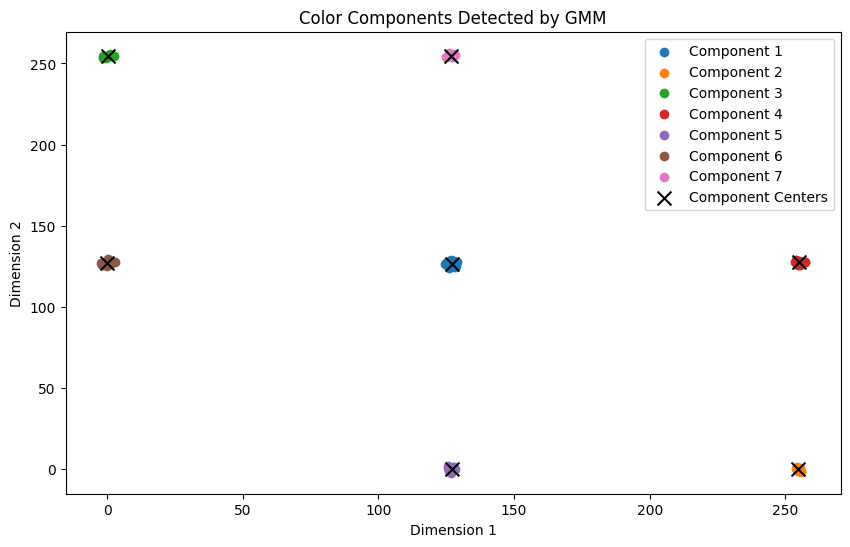

Component 1 - Mean: [127.17292232 126.60536724], Covariance: [[ 1.19754533 -0.01923169]
 [-0.01923169  1.70463777]], Weight: 0.2
Component 2 - Mean: [ 2.54828851e+02 -2.08589583e-01], Covariance: [[ 0.38531507 -0.21305776]
 [-0.21305776  0.64412607]], Weight: 0.15
Component 3 - Mean: [  0.2674397  254.51816147], Covariance: [[1.63856537 0.49894624]
 [0.49894624 0.65573231]], Weight: 0.09000000000000001
Component 4 - Mean: [255.16566837 127.35850043], Covariance: [[ 1.02962802 -0.03525602]
 [-0.03525602  0.57207645]], Weight: 0.17
Component 5 - Mean: [ 1.27065742e+02 -8.44575440e-02], Covariance: [[0.72802356 0.03254854]
 [0.03254854 1.04653338]], Weight: 0.13999999999999999
Component 6 - Mean: [9.95904977e-02 1.26934805e+02], Covariance: [[1.6740466  0.30152784]
 [0.30152784 0.89468541]], Weight: 0.17
Component 7 - Mean: [126.9316877  254.85195292], Covariance: [[1.09300903 0.05372962]
 [0.05372962 0.93233538]], Weight: 0.08


In [7]:
plt.figure(figsize=(10, 6))
for i in range(n_components):
    plt.scatter(data[cluster_assignments == i, 0], data[cluster_assignments == i, 1], label=f'Component {i+1}')

plt.scatter(component_means[:, 0], component_means[:, 1], c='black', marker='x', s=100, label='Component Centers')
plt.legend()
plt.title('Color Components Detected by GMM')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Print the component parameters
for i in range(n_components):
    print(f"Component {i+1} - Mean: {component_means[i]}, Covariance: {component_covariances[i]}, Weight: {component_weights[i]}")

In [24]:
def generate_sample_dataset(n, means, covariances):
    new_data = []
    for i in range(n):
        component_samples = np.random.multivariate_normal(means[i], covariances[i], 2000)
        new_data.append(component_samples)
    return np.vstack(new_data)

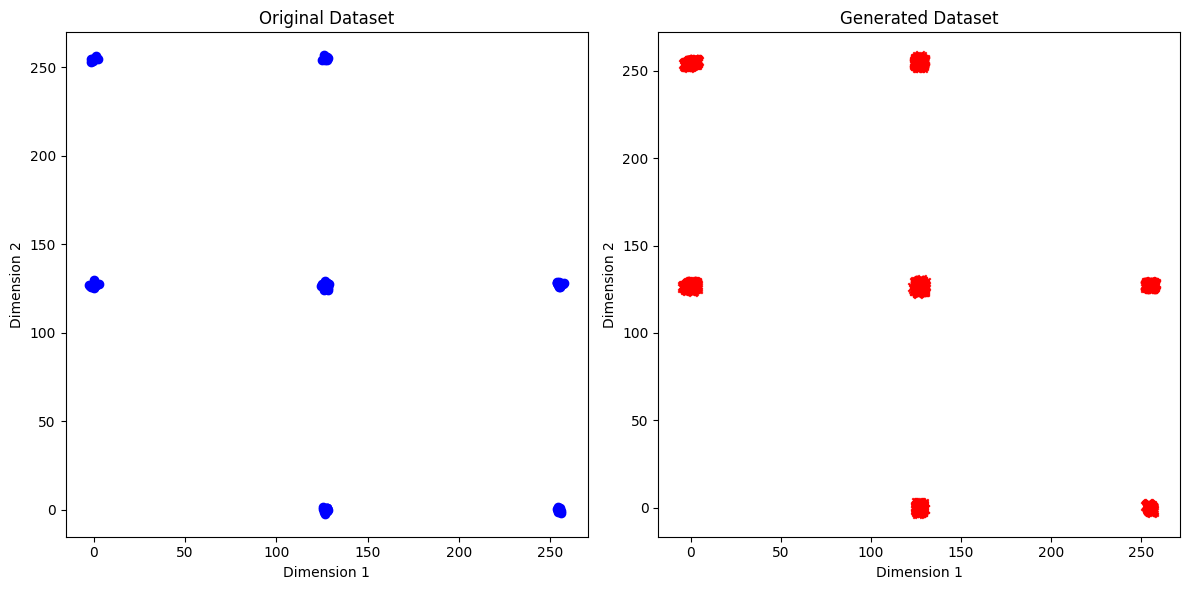

In [26]:
generated_data = generate_sample_dataset(n_components, component_means, component_covariances)
# print(len(data))
# print(len(generated_data))
# for i in generated_data:
#     print(i)
# print(generated_data)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', label='Original Data')
plt.title('Original Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.subplot(1, 2, 2)
plt.scatter(generated_data[:, 0], generated_data[:, 1], c='red', marker='x', label='Generated Data')
plt.title('Generated Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.tight_layout()
plt.show()